In [1]:
import seaborn as sns
import pandas as pd
# Wczytanie zbioru Titanic
df = sns . load_dataset ('titanic')
print ( df . shape )
print ( df . head () )

(891, 15)
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


--- INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

--- DESCRIBE ---
         survived      pclass         age  

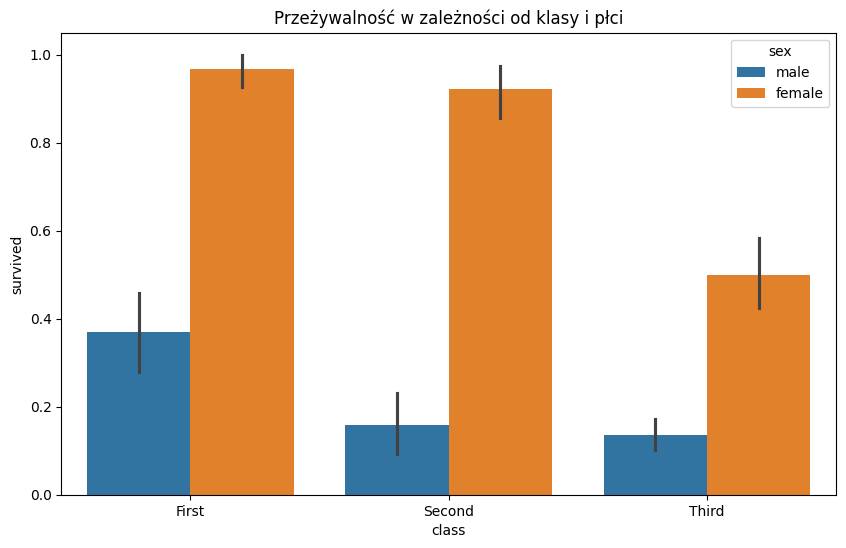

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1
df = sns.load_dataset('titanic')

# 1.1
print("--- INFO ---")
print(df.info())
print("\n--- DESCRIBE ---")
print(df.describe())

# 1.2
print("\n--- BRAKI DANYCH ---")
print(df.isnull().sum())

# 1.3
print("\n--- PRZEŻYWALNOŚĆ OGÓŁEM ---")
print(df['survived'].value_counts(normalize=True))

print("\n--- PRZEŻYWALNOŚĆ WEDŁUG PŁCI ---")
print(df.groupby('sex')['survived'].mean())

print("\n--- PRZEŻYWALNOŚĆ WEDŁUG KLASY ---")
print(df.groupby('class', observed=True)['survived'].mean())

# 1.4
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='class', y='survived', hue='sex')
plt.title('Przeżywalność w zależności od klasy i płci')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

# 2.1
cols_to_drop = ['deck', 'embark_town', 'alive', 'who', 'adult_male']
df_clean = df.drop(columns=cols_to_drop)
df_clean = df_clean.dropna(subset=['embarked'])

# 2.2
df_clean['age'] = df_clean['age'].fillna(df_clean['age'].median())

# 2.3
df_encoded = pd.get_dummies(df_clean, columns=['sex', 'embarked', 'class'], drop_first=True)
X = df_encoded.drop('survived', axis=1)
y = df_encoded['survived']

# 2.4
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Rozmiar zbioru treningowego: {X_train.shape}")
print(f"Rozmiar zbioru testowego: {X_test.shape}")

Rozmiar zbioru treningowego: (711, 11)
Rozmiar zbioru testowego: (178, 11)


In [4]:
from sklearn.linear_model import LogisticRegression

# 3.1
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# 3.2
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\n--- WSPÓŁCZYNNIKI ---")
print(coef_df.head(3))

# 3.3
coef_df['Odds_Ratio'] = np.exp(coef_df['Coefficient'])
print("\n--- ODDS RATIO ---")
print(coef_df[['Feature', 'Odds_Ratio']])


--- WSPÓŁCZYNNIKI ---
    Feature  Coefficient
6  sex_male    -2.475732
0    pclass    -0.783356
5     alone    -0.624589

--- ODDS RATIO ---
         Feature  Odds_Ratio
6       sex_male    0.084101
0         pclass    0.456870
5          alone    0.535481
2          sibsp    0.670835
7     embarked_Q    1.478000
10   class_Third    0.691293
8     embarked_S    0.752067
3          parch    0.805027
9   class_Second    0.957142
1            age    0.965959
4           fare    1.002346


Jeżeli Odds Ratio dla zmiennej sex_male wynosi ok.0.07, oznacza to, że prawdopodobieństwo przeżycia mężczyzny jest około o 93% mniejsze niż w przypadku kobiety, przy założeniu, że pozostałe zmienne pozostają bez zmian. Wartość OR < 1 wskazuje na negatywny wpływ danej cechy na szanse wystąpienia zdarzenia pozytywnego, czyli – w tym przypadku – na przeżycie.

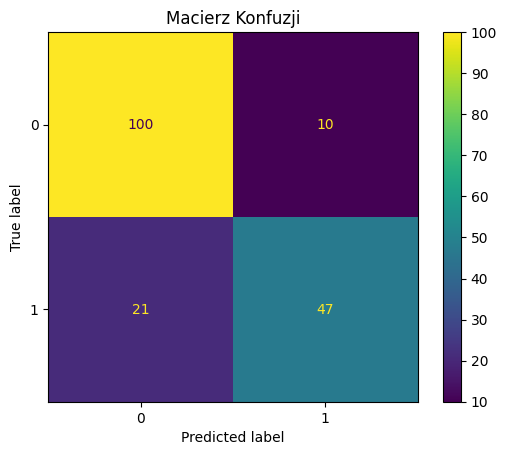

Accuracy: 0.8258
Precision: 0.8246
Recall: 0.6912
F1-score: 0.7520
Specificity: 0.9091


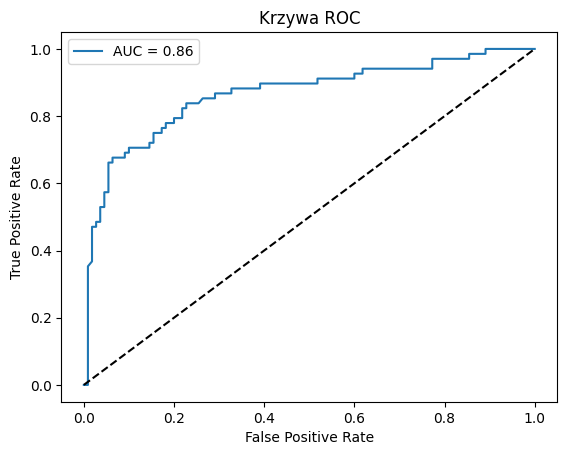

In [5]:
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, accuracy_score,
                             precision_score, recall_score, f1_score, roc_curve, roc_auc_score)

# 4.1
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 4.2
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Macierz Konfuzji")
plt.show()

# 4.3
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred):.4f}")
print(f"Specificity: {specificity:.4f}")

# 4.4
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC')
plt.legend()
plt.show()


--- ZMIANA PROGU ---
Próg 0.3: Recall=0.84, Precision=0.67
Próg 0.4: Recall=0.76, Precision=0.73
Próg 0.5: Recall=0.69, Precision=0.82
Próg 0.6: Recall=0.63, Precision=0.88
Próg 0.7: Recall=0.53, Precision=0.88

Accuracy (Balanced): 0.8034


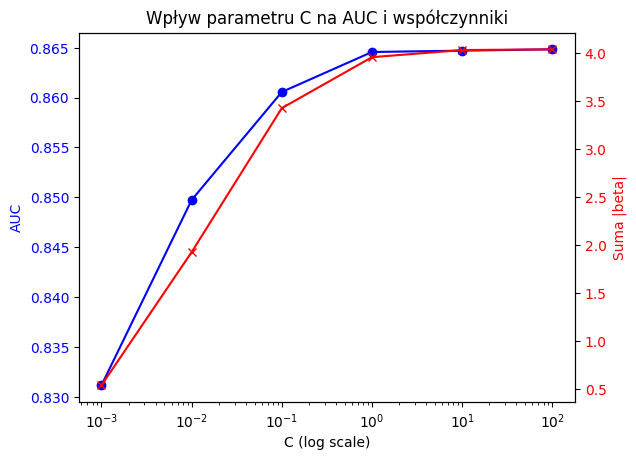


--- PORÓWNANIE L1 vs L2 (C=0.1) ---
         Feature   L2_Coef   L1_Coef
0         pclass -0.435802 -0.653579
1            age -0.373769 -0.277112
2          sibsp -0.322806 -0.115996
3          parch -0.149507 -0.004440
4           fare  0.138323  0.029173
5          alone -0.245431 -0.006730
6       sex_male -1.107063 -1.127438
7     embarked_Q  0.103291  0.004274
8     embarked_S -0.132778 -0.130958
9   class_Second -0.063327  0.000000
10   class_Third -0.336340 -0.062192


In [7]:
from sklearn.preprocessing import StandardScaler

# 5.1
print("\n--- ZMIANA PROGU ---")
thresholds_list = [0.3, 0.4, 0.5, 0.6, 0.7]
for t in thresholds_list:
    preds_t = (y_pred_proba >= t).astype(int)
    rec = recall_score(y_test, preds_t)
    prec = precision_score(y_test, preds_t)
    print(f"Próg {t}: Recall={rec:.2f}, Precision={prec:.2f}")

# 5.2
model_bal = LogisticRegression(class_weight='balanced', max_iter=1000)
model_bal.fit(X_train, y_train)
print(f"\nAccuracy (Balanced): {accuracy_score(y_test, model_bal.predict(X_test)):.4f}")

# 6.1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6.2
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
auc_scores = []
coef_sums = []

for C in C_values:
    m = LogisticRegression(C=C, penalty='l2', solver='lbfgs', max_iter=1000)
    m.fit(X_train_scaled, y_train)
    auc = roc_auc_score(y_test, m.predict_proba(X_test_scaled)[:, 1])
    auc_scores.append(auc)
    coef_sums.append(np.sum(np.abs(m.coef_)))

fig, ax1 = plt.subplots()
ax1.set_xlabel('C (log scale)')
ax1.set_ylabel('AUC', color='blue')
ax1.plot(C_values, auc_scores, color='blue', marker='o')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xscale('log')
ax2 = ax1.twinx()
ax2.set_ylabel('Suma |beta|', color='red')
ax2.plot(C_values, coef_sums, color='red', marker='x')
ax2.tick_params(axis='y', labelcolor='red')
plt.title('Wpływ parametru C na AUC i współczynniki')
plt.show()

# 6.3
model_l2 = LogisticRegression(C=0.1, penalty='l2', solver='liblinear')
model_l2.fit(X_train_scaled, y_train)
model_l1 = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
model_l1.fit(X_train_scaled, y_train)
print("\n--- PORÓWNANIE L1 vs L2 (C=0.1) ---")
comp_df = pd.DataFrame({
    'Feature': X.columns,
    'L2_Coef': model_l2.coef_[0],
    'L1_Coef': model_l1.coef_[0]
})
print(comp_df)